Objetivos:
    
    • Neste trabalho iremos construir um modelo de machine learn capaz de prever o preço de casas de certo local no estados unidos (Kaggle Dataset).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
import xgboost

# Load da base

In [2]:
train = pd.read_csv('train.csv')
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


# Analise dos dados

In [3]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
import matplotlib.pyplot as plt

In [5]:
train.columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'Pav

## Tratando grande quantidade de valores nulos

<AxesSubplot:>

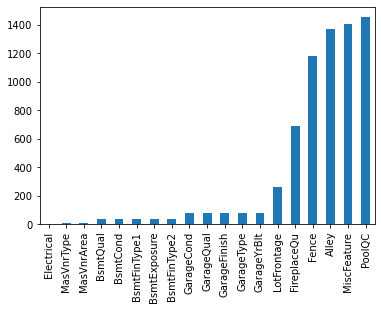

In [6]:
#Grafico de null por coluna
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [7]:
missing = train.isnull().sum()
missing = missing[missing > 0]
missing

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [8]:
#Eliminar colunas com mais de 270 valores null
max_number_of_nas = 270
train = train.loc[:, (train.isnull().sum(axis=0) <= max_number_of_nas)]
train.shape

(1460, 76)

<AxesSubplot:>

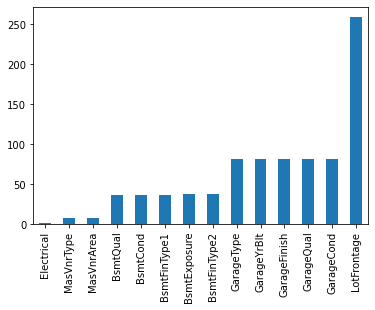

In [9]:
#Grafico após eliminar colunas
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

## Parse de variáveis categóricas com OneHotEncoder

In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [11]:
columns_dummy = train.select_dtypes('object').columns
columns_dummy

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [12]:
trf_train = ColumnTransformer([
    ('enc', OneHotEncoder(sparse = False), columns_dummy)
], remainder ='passthrough')
train = pd.DataFrame(trf_train.fit_transform(train), columns = trf_train.get_feature_names())
train = train.dropna()

## Tratamento de Outliers

Como tirar outliers:
    • scatterplot e boxplot (Ver outliers)
    • para tirar usar ZScore (how to outlier remove by zscore)

In [13]:
# columns_delete = ['YearBuilt', 'YearRemodAdd','GarageYrBlt']

In [14]:
# train = train.drop(columns_delete,axis=1)
# train.describe()

In [15]:
# train = train.drop(train[train['SalePrice'] > 600000].index)
# train.describe()

# Regressão Linear

## Split da base de treino

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [17]:
X = train.drop('SalePrice', axis = 1)
y = train['SalePrice']

### Ajuste da variável target

In [18]:
y = pd.DataFrame(y)
y.shape

(1121, 1)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

# Treino do modelo LinearRegression

## Linear Regression with train test split

In [20]:
reg = LinearRegression().fit(X_train, y_train)

In [21]:
predict = reg.predict(X_test)

# Métricas / Score

## Scatterplot

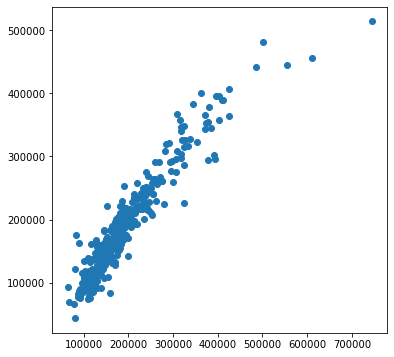

In [22]:
plt.figure(figsize=(6,6))
plt.scatter(y_test,predict)

## Distribuição de densidade de erros

C:\Users\Philip Guedes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

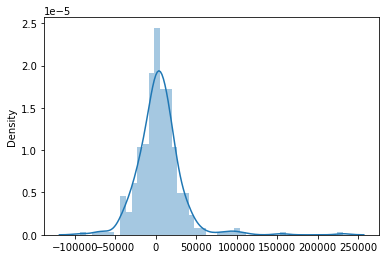

In [23]:
sns.distplot((y_test-predict))

## Métricas

In [24]:
from sklearn import metrics

In [25]:
print('MAE:', metrics.mean_absolute_error(y_test, predict))
print('MSE:', metrics.mean_squared_error(y_test, predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict)))
print('MAPE:', round((metrics.mean_absolute_percentage_error(y_test, predict))*100,2),"%")

MAE: 18380.191858610502
MSE: 796416828.9363796
RMSE: 28220.85804748643
MAPE: 10.24 %


## LinearRegression with CrossValidation

In [26]:
from sklearn.model_selection import KFold

In [27]:
num_folds = 4
seed = 10

kfold = KFold(num_folds, shuffle = True, random_state = seed)

In [28]:
reg_kfold = LinearRegression()
score_kfold = cross_val_score(reg_kfold, X,y, cv= kfold)
predict_kfold = cross_val_predict(reg_kfold, X, y, cv=kfold, method='predict')
predict_kfold = pd.DataFrame(predict_kfold, columns=['Price_predict'])
predict_kfold

,Price_predict
0,203765.955322
1,223126.159180
2,199325.042969
3,164314.292969
4,299684.455322
...,...
1116,176584.292969
1117,213952.792969
1118,331543.292969
1119,132730.280429


In [29]:
print('Score:', score_kfold)

Score: [-9.93385324e+09  4.36261289e-01 -6.73843827e+07 -3.60188538e+07]


In [30]:
print('Valor Minimo: ',predict_kfold.min())
print('------------------------------------------------------------')
print('Describe')
print(predict_kfold.describe())

Valor Minimo:  Price_predict   -1.149917e+11
dtype: float64
------------------------------------------------------------
Describe
       Price_predict
count   1.121000e+03
mean   -1.158023e+08
std     4.341979e+09
min    -1.149917e+11
25%     1.298145e+05
50%     1.674462e+05
75%     2.243142e+05
max     5.588074e+10


# XGBoost

X_train, X_test, y_train, y_test 

In [31]:
from xgboost import XGBRegressor

In [32]:
arvores_poderosas = XGBRegressor(learning_rate = 0.07,
                               n_estimators = 500,
                                 max_depth = 3,
                                 min_child_weight = 2,
                                 subsample = 0.6,
                                 colsample_bynode = 0.05,
                                 num_parallel_tree = 9,
                                 random_state = 0)
arvores_poderosas.fit(X_train,y_train)

predict_xgb = arvores_poderosas.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predict_xgb))
print('MSE:', metrics.mean_squared_error(y_test, predict_xgb))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict_xgb)))
print('MAPE:', round((metrics.mean_absolute_percentage_error(y_test, predict_xgb))*100,2),"%")

MAE: 15462.852924408784
MSE: 795496943.8272275
RMSE: 28204.55537368436
MAPE: 7.92 %


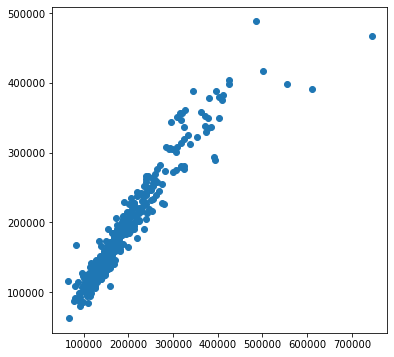

In [33]:
plt.figure(figsize=(6,6))
plt.scatter(y_test,predict_xgb)

C:\Users\Philip Guedes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

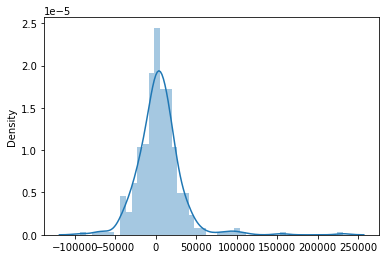

In [34]:
predict_xgb = pd.DataFrame(predict_xgb)
sns.distplot((y_test-predict))

## Afazeres:
    Tirar Outlier da base (Check);
    
    MAPE (Ver métrica)
    ver a questão de colinearidade entre colunas
    metodos de seleção de variáveis
    Ver validação cruzada (Overfitting)
    Estudar underfitting e overfitting
    
    Tunagem de parametros (how to parameters tunning xgboosting python)
    One hot encoding das features categóricas